In [27]:
import sys
import sklearn
import numpy as np
import os

np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt

In [28]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

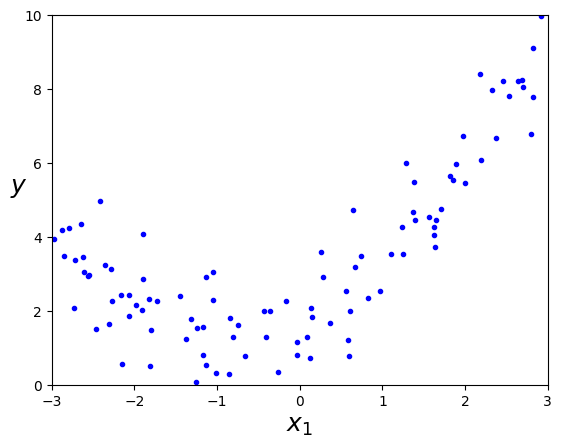

In [29]:
plt.plot(X, y, "b. ")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [30]:
# 확장된 훈련 데이터에 선형회귀 적용하기
# PloynomialFeatures() : 훈련세트 X에 있는 각 특성을 제곱하여 새로운 훈련 데이터셋 생성
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

ploy_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = ploy_features.fit_transform(X)
X[0]

array([-0.75275929])

In [31]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

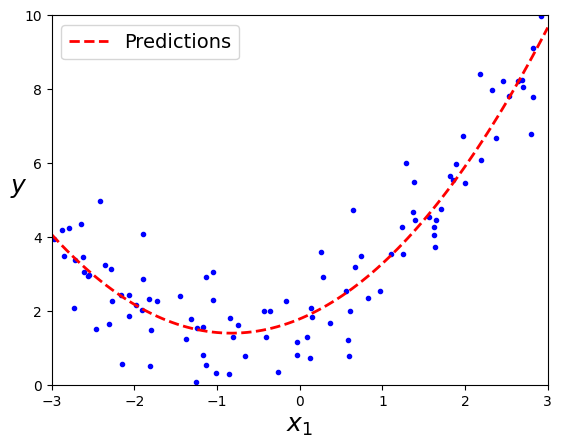

In [33]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = ploy_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b. ")
plt.plot(X_new, y_new, "r--", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

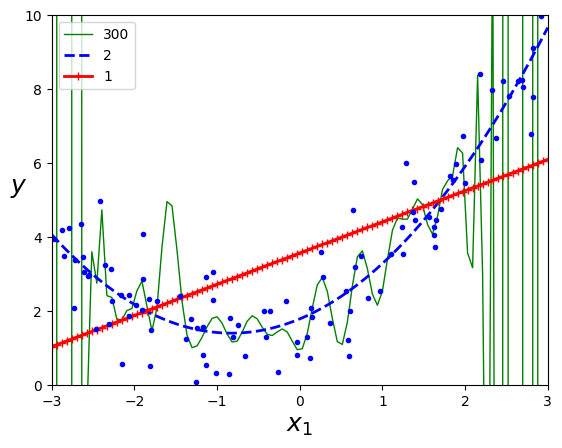

In [34]:
from numpy.lib import polynomial
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
  # 평균 0, 분산 1
  polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
  std_scaler = StandardScaler()
  lin_reg = LinearRegression()

  # Pipeline() : 데이터 사전 처리 및 회귀의 모든 단계를 포함하는 단일 개체 생성
  polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
       ("std_scaler", std_scaler),
       ("lin_reg", lin_reg),
    ])
  polynomial_regression.fit(X, y)
  y_newbig = polynomial_regression.predict(X_new)
  plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b. ", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [37]:
# 모델의 일반화 성능 추정
# 단순 선형회귀 모델의 학습 곡선 그리기

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)+1):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.legend(loc="upper left", fontsize=14)
  plt.xlabel("Training set size", fontsize=14)
  plt.ylabel("RMSE", rotation=0, fontsize=14)

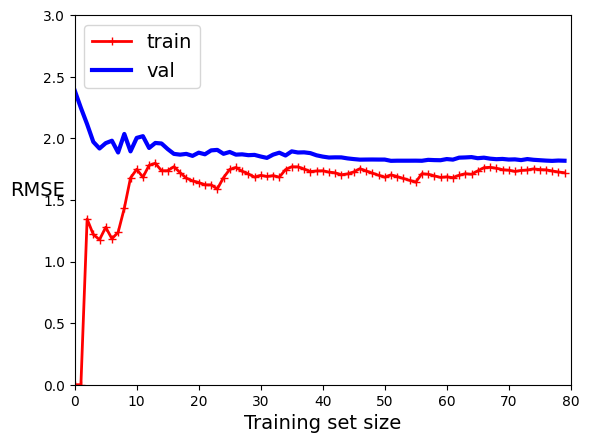

In [38]:
lin_reg = LinearRegression()

plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

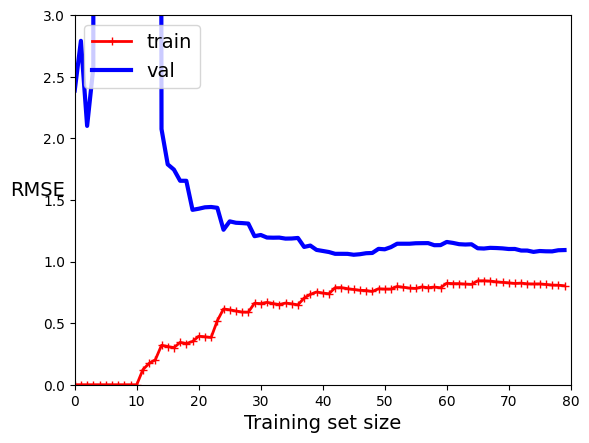

In [39]:
# PolynomialFeatures() : 훈련 세트에 있는 각 특성을 제곱하여 새로운 훈련 데이터셋 생성
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.show()

In [8]:
# 릿지회귀

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [9]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [10]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

In [11]:
#라쏘 회귀
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [12]:
# 엘라스틱넷
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])